In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# HW Assignment 4
Author: Maria Lentini

## Problem 1

Testing out steepest gradient descent algorithm, correct answer is [1, 1]: it works!

In [69]:
from steepest_descent_rosenbrock import steepest_gradient_descent

# Example usage:
x0 = 2 * np.ones(2)  # Initial guess
tol = 1e-7
optimized_x, trace = steepest_gradient_descent(x0, tol, max_iter=10000)
print("Optimized solution:", optimized_x)

Optimized solution: [1.00806392 1.01622497]


### 1.2 Plot objective function over iterations

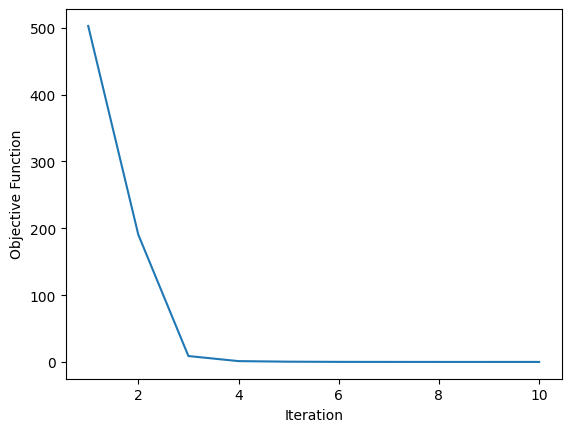

In [55]:
results = pd.DataFrame(trace)

x, y = results.iter, results.obj_fun
n = 10
plt.plot(x[:n], y[:n])
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

### 1.3 Plot $|| x_{k+1} - x_k ||$ over iterations

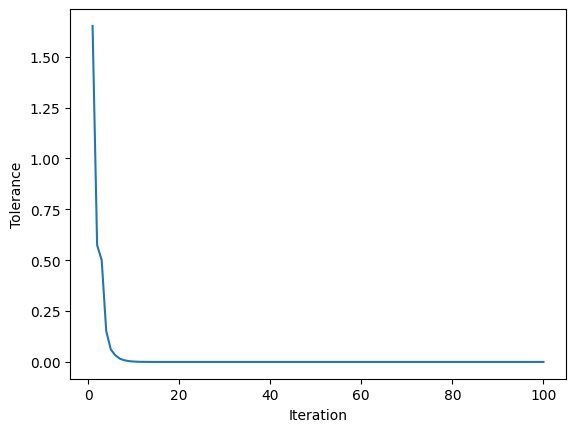

In [60]:
x, y = results.iter, results.tol
n = 100
plt.plot(x[:n], y[:n])
plt.ylabel('Tolerance')
plt.xlabel('Iteration')
plt.show()

### 1.1 Try different initial guesses.

Conclusions:
1. A change in step size from 1-3 to 1e-4 did not impact convergence.
2. Moving from an initial guess of [2, 2] to [1, 1] shortend the number of iterations required for convergence.

In [43]:
results = {
    'initial_guess': [], 
    'step_size': [], 
    'n_iter': [], 
    'solution': []
}

# convergence tolerance
tol = 1e-7
# intitial guesses to try
x0s = [2 * np.ones(2), 1.2 * np.ones(2)]
# step sizes to try
stepsizes = [1e-3, 1e-4]

for x0, stepsize in product(x0s, stepsizes):
    optimized_x, trace = steepest_gradient_descent(
        x0, tol, stepsize=stepsize, max_iter=100000
    )

    n_iter = trace['iter'][-1]

    results['initial_guess'].append(x0)
    results['step_size'].append(stepsize)
    results['n_iter'].append(n_iter)
    results['solution'].append(optimized_x)

pd.DataFrame(results)

,initial_guess,step_size,n_iter,solution
0,"[2.0, 2.0]",0.0010,20744,"[1.000111753516253, 1.0002239666839485]"
1,"[2.0, 2.0]",0.0001,20744,"[1.000111753516253, 1.0002239666839485]"
2,"[1.2, 1.2]",0.0010,17743,"[1.000111755105471, 1.0002239698690982]"
3,"[1.2, 1.2]",0.0001,17743,"[1.000111755105471, 1.0002239698690982]"


## Problem 2

Newton's method only takes a few iterations becuase it is being applied to a quadratic function.

In [135]:
from src.Optimizer import Optimizer
x0s = [np.array([2, 2]), np.array([-5, 5]), np.array([7, 8])]

results = {
    'initial_guess': [], 
    'step_size': [], 
    'n_iter': [], 
    'solution': [],
    'method': [],
    'a': []
}

for x0 in x0s:
    for a in [1, 100]:
        for method in ['steepest_grad_descent', 'newtons_method']:
            opt = Optimizer(x0, method, func='quadratic',)
            optimized_x, trace = opt.fit(a=a)

            n_iter = trace['iter'][-1]
            results['initial_guess'].append(x0)
            results['step_size'].append(stepsize)
            results['n_iter'].append(n_iter)
            results['solution'].append(optimized_x)
            results['method'].append(method)
            results['a'].append(a)

results = pd.DataFrame(results)
results

,initial_guess,step_size,n_iter,solution,method,a
0,"[2, 2]",0.0001,5468,"[3.522327674705872e-05, 3.522327674705872e-05]",steepest_grad_descent,1
1,"[2, 2]",0.0001,10000,"[9.034669195409671e-05, 9.034669195409671e-05]",newtons_method,1
2,"[2, 2]",0.0001,5295,"[4.980192297845358e-05, 1e-323]",steepest_grad_descent,100
3,"[2, 2]",0.0001,10000,"[9.034669195409671e-05, 9.034669195409671e-05]",newtons_method,100
4,"[-5, 5]",0.0001,5925,"[-3.527176010200268e-05, 3.527176010200268e-05]",steepest_grad_descent,1
5,"[-5, 5]",0.0001,10000,"[-0.0002258667298852426, 0.0002258667298852426]",newtons_method,1
6,"[-5, 5]",0.0001,5752,"[-4.987047322509857e-05, 1e-323]",steepest_grad_descent,100
7,"[-5, 5]",0.0001,10000,"[-0.0002258667298852426, 0.00022586672988524255]",newtons_method,100
8,"[7, 8]",0.0001,6129,"[3.282355304928368e-05, 3.7512632056323996e-05]",steepest_grad_descent,1
9,"[7, 8]",0.0001,10000,"[0.00031621342183934024, 0.00036138676781638686]",newtons_method,1
